In [1]:
!ls

BCG1.pages                     ml_case_training_hist_data.csv
Explore and Clean.py           ml_case_training_output.csv
ExploreandClean.ipynb          task2-data-description.pdf
ExploreandClean.pdf            task2-eda-cleaning.pdf
ml_case_training_data.csv


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
#set maximum number of columns to be displayed
pd.set_option('display.max_columns',100)

## 1. Loading data
### Data directory
Explicityly show how paths are indicated

In [2]:
train_data=pd.read_csv("ml_case_training_data.csv")
churn_data=pd.read_csv("ml_case_training_output.csv")
history_data=pd.read_csv("ml_case_training_hist_data.csv")

In [4]:
train_data.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

There are a lot of missing values. We will replace or remove them later. There are some dates are object type, which we will transform them to the right format later.

In [7]:
churn_data.head(3)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


It seems that the churn data is in the correct format as it shows 0 for not churned and 1 for churned.

In [8]:
history_data.head(3) 

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


This data is time series. Every id has many rows.

It looks like a lot of are zeros.

In [3]:
all_=train_data.merge(churn_data,on='id')

## Clean the data
### 1. remove duplicates, check missing values and outliers, data type conversion, transformations, and multicolinearity.

### Data types
date columns should be converted to datetime type

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [11]:
history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [12]:
train_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


Some key observations:
1. The minimum consumption and forcasts columns are negative. It is very likely that they are corrupted
2. The column 'campaign_disc_ele' is an empty columns.
3. A lot of variables are skewed.

In [13]:
#one column is all null ---delete
#verify
train_data['campaign_disc_ele'].isnull().values.all()

True

In [4]:
train_data=train_data.drop(labels=['campaign_disc_ele'],axis=1)

In [15]:
history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [16]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Some observations:
1. some columns might be highly skewed.
2. Some negative values might have been corrupted.

### Missing data

In [17]:
pd.DataFrame({"Missing values(%)":train_data.isnull().sum()/len(train_data.index)*100})

,Missing values(%)
id,0.000000
activity_new,59.300447
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765
date_modif_prod,0.975398


Some columns have around 80% missing values. We might need to remove them.

In [18]:
pd.DataFrame({"Missing values(%)":history_data.isnull().sum()/len(history_data.index)*100})

,Missing values(%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


A lot of columns have around 70% missing values. We will dive into deeper to see how to deal with it.

## 3. Data Visualization

### distribution of churn

In [6]:
churn=all_[['id','churn']]
churn.columns=['Companies','churn']
churn

,Companies,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [7]:
churn_total=churn.groupby(churn['churn']).count()

In [9]:
churn_percentage=churn_total/churn_total.sum()*100

In [22]:
churn_percentage

,Companies
churn,
0,90.090706
1,9.909294


In [10]:
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_='upper right'):
    """
    Plot stacked bars with annotations
    """
    ax=dataframe.plot(kind='bar',stacked=True,figsize=size_,rot=rot_,title=title_)
    #Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    #rename legend
    plt.legend(['Retention','churn'],loc=legend_)
    ## Labels
    plt.ylabel("Company base(%)")
    plt.show()

def annotate_stacked_bars(ax,pad=0.99,colour='white',textsize=13):
    """
    Add value annotation to the bars
    """
    #Iterate over the plotted rectanges/bars
    for p in ax.patches:
        #Calculate annotation
        value=str(round(p.get_height(),1))
        #If value is 0 do not annotate
        if value=='0.0':
            continue
        ax.annotate(value,((p.get_x()+p.get_width()/2)*pad-0.05,(p.get_y()+p.get_height()/2)*pad),
                   color=colour,size=textsize)

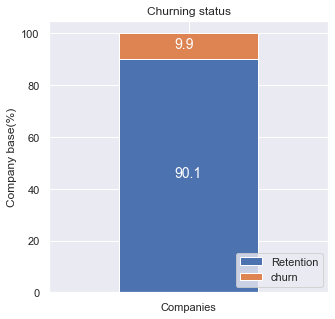

In [11]:
plot_stacked_bars(churn_percentage.T,"Churning status",(5,5),legend_='lower right')

About 10% of the total customers have churned. So the data is imbalanced.

### SME activity
distribution of activities as well as sales channel. They can be, intuitively, important predictive feature for energy consumption.

In [13]:
activity=all_[['id','activity_new','churn']]

In [26]:
activity['activity_new'].isnull().sum()/len(activity.index)

0.5930044731610338

In [20]:
activity_group=activity.groupby(['activity_new','churn'])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)

In [21]:
activity_group

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


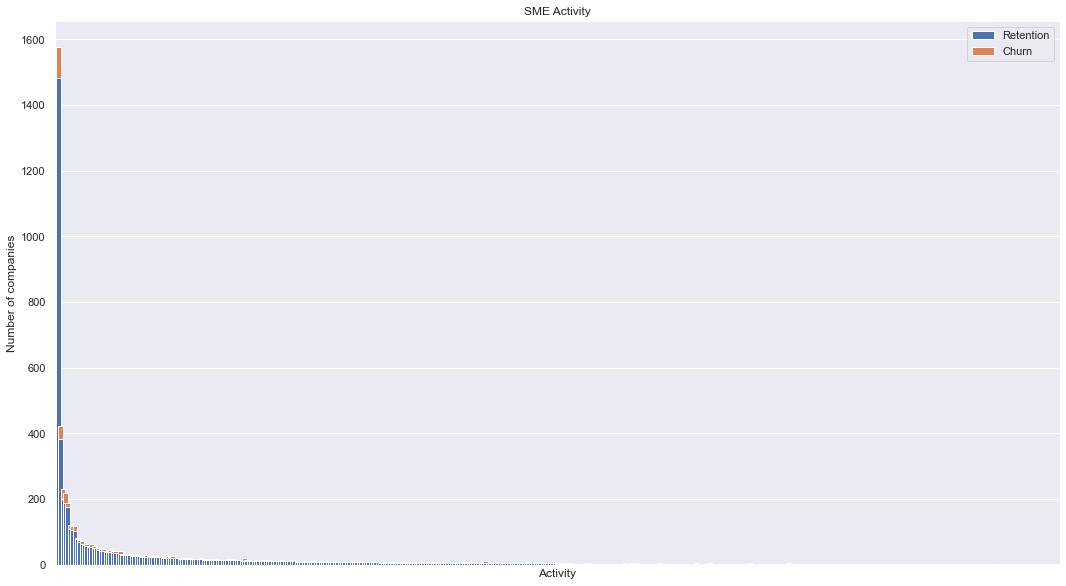

In [29]:
_=activity_group.plot(kind='bar',figsize=(18,10),width=2,stacked=True,title='SME Activity')
#Label
_=plt.ylabel("Number of companies")
_=plt.xlabel("Activity")
#Rename legend
plt.legend(['Retention','Churn'],loc='upper right')
#Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

We see churn is not specifically related to any SME cateogry in particular.

Take a look at the values percentage-wise.

In [22]:
activity_group

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


In [26]:
activity_total=activity_group.fillna(0)[0]+activity_group.fillna(0)[1]

In [28]:
activity_percentage=activity_group.fillna(0)[1]/(activity_total)*100

In [29]:
activity_percentage

activity_new
apdekpcbwosbxepsfxclislboipuxpop      5.897273
kkklcdamwfafdcfwofuscwfwadblfmce      9.004739
kwuslieomapmswolewpobpplkaooaaew     13.043478
fmwdwsxillemwbbwelxsampiuwwpcdcb     14.611872
ckfxocssowaeipxueikxcmaxdmcduxsa      6.878307
                                       ...    
opoiuuwdmxdssidluooopfswlkkkcsxf    100.000000
pfcocskbxlmofswiflsbcefcpufbopuo    100.000000
wceaopxmdpccxfmcdpopulcaubcxibuw    100.000000
wkwdccuiboaeaalcaawlwmldiwmpewma    100.000000
xwkaesbkfsacseixxksofpddwfkbobki    100.000000
Length: 419, dtype: float64

In [33]:
pd.DataFrame({"Percentage churn":activity_percentage,"Total companies":activity_total}).sort_values(by='Percentage churn',
                                                                                                   ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


Some activity has a 100% churn rate but that is due to there is only few companies.

Given the large number of categories and low number of companies per category, SME activity might not be quite helpful.

### Sales channel
The sales channel might be helpful since it is not the same if the sales were through email or telophone.

In [38]:
channel=all_[['id','channel_sales','churn']]
channel=channel.groupby(['channel_sales','churn'])['id'].count().unstack(level=1).fillna(0)

In [35]:
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [46]:
#channel_total=channel[0]+channel[1]

In [52]:
#channel_churn_perc=pd.DataFrame({'percentage of 0':channel[0]/channel_total*100,'percentage of 1':channel[1]/channel_total*100}).sort_values(by=['percentage of 0'],ascending=False)

In [36]:
channel_churn=(channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1],ascending=False)

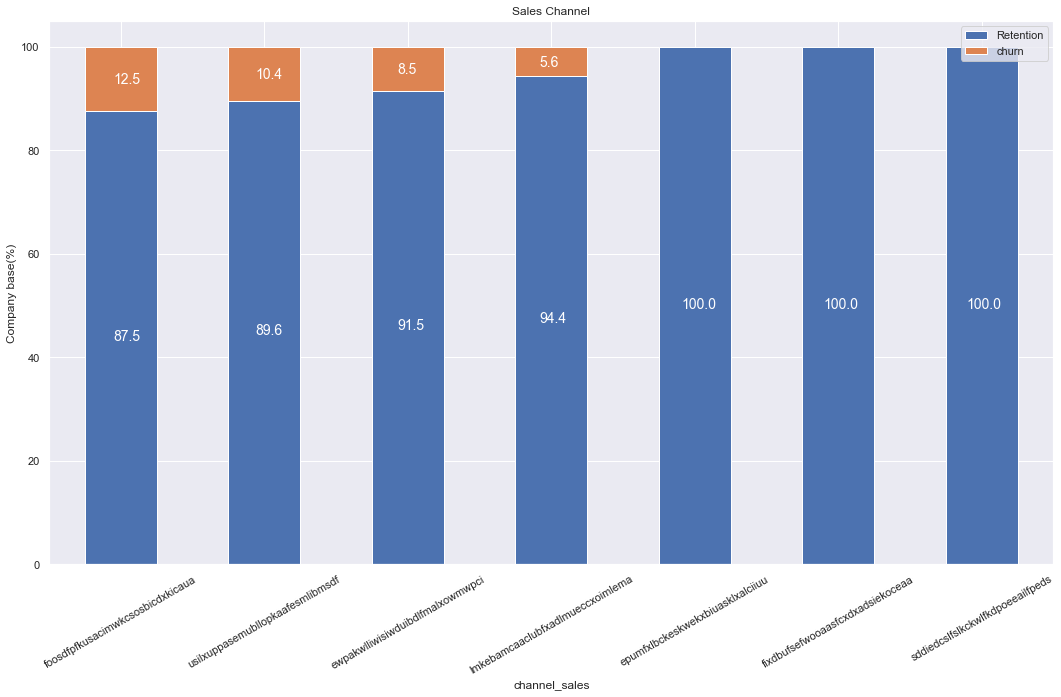

In [37]:
plot_stacked_bars(channel_churn,"Sales Channel",rot_=30)

In [38]:
channel_total=channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage=channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage":channel_percentage,
             "Total companies":channel_total}).sort_values(by='Churn percentage',
                                                          ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


## Consuption
distribution of the consumption over the last year and last month

In [40]:
consumption=all_[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

Because they are all continuous variables, we will do histogram to churn distribution and distributon of churn for churn vs no churn.

In [55]:
def plot_distribution(dataframe,column,ax,bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    #Create a temporal dataframe witht the data to be plot
    temp=pd.DataFrame({"Retention":dataframe[dataframe['churn']==0][column],
                      "Churn":dataframe[dataframe['churn']==1][column]})
    #Plot the histogram
    _=temp[['Retention','Churn']].plot(kind='hist',bins=bins_,ax=ax,stacked=True)
    _=ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

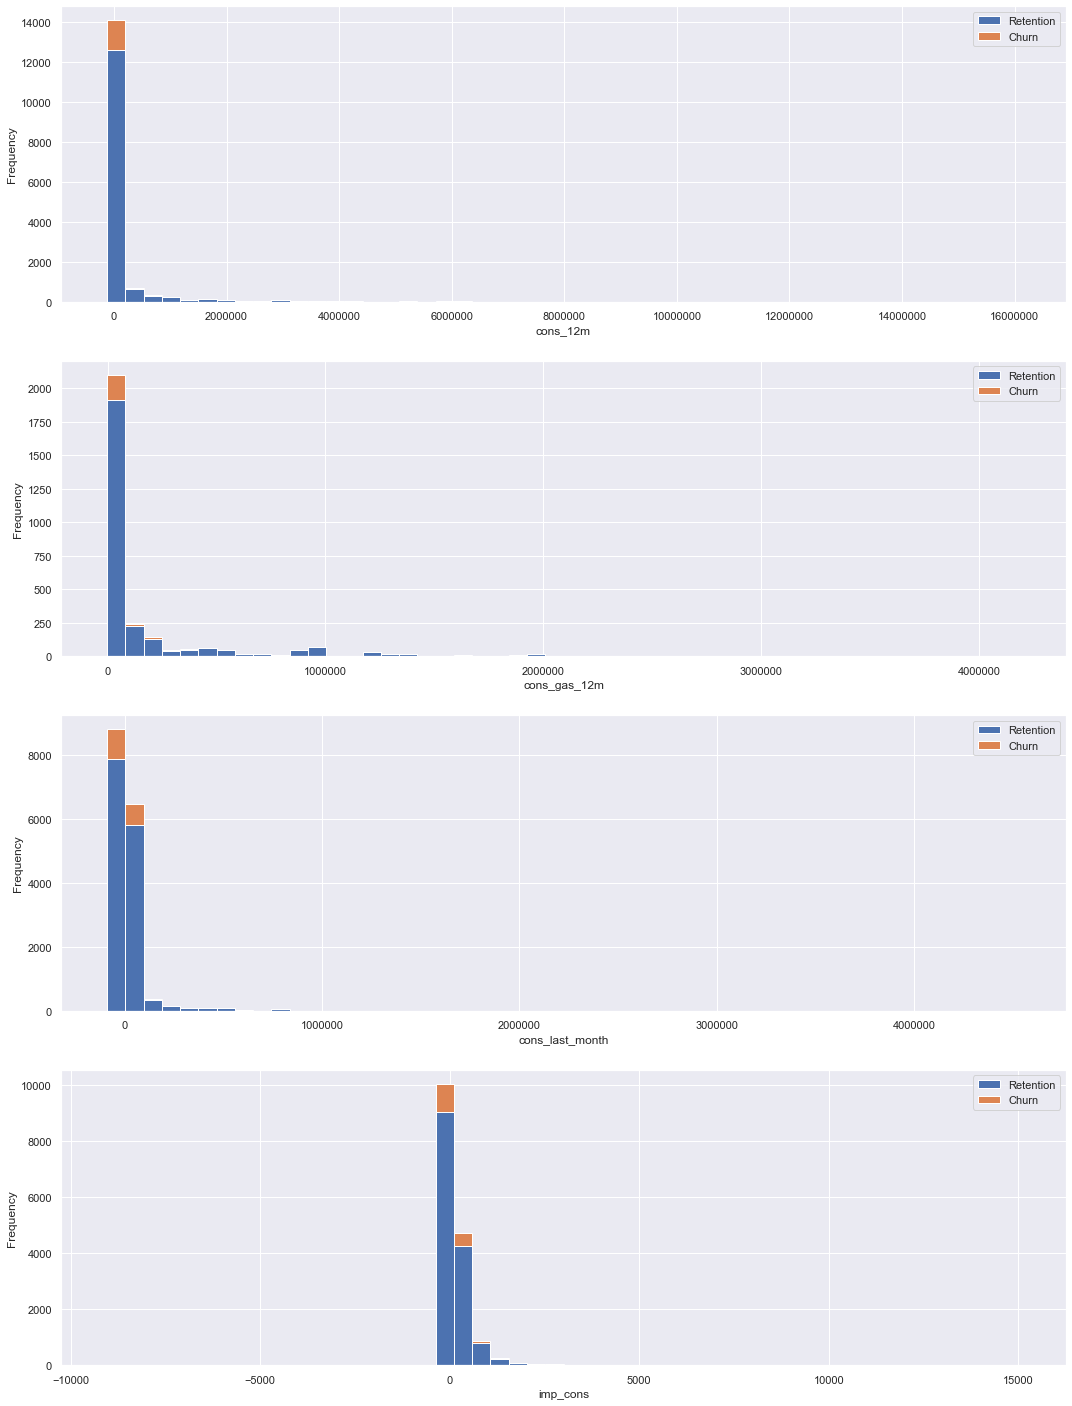

In [56]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
plot_distribution(consumption,"cons_12m",axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption['has_gas']=='t'],'cons_gas_12m',axs[1])
plot_distribution(consumption, "cons_last_month", axs[2]) 
plot_distribution(consumption, "imp_cons", axs[3])

The consusmption data is highly skewed to the right. The values on the higher end and lower ends of the distribution are likely to be outliers. We can use boxplots to display the distributon of data.

(-20000.0, 100000.0)

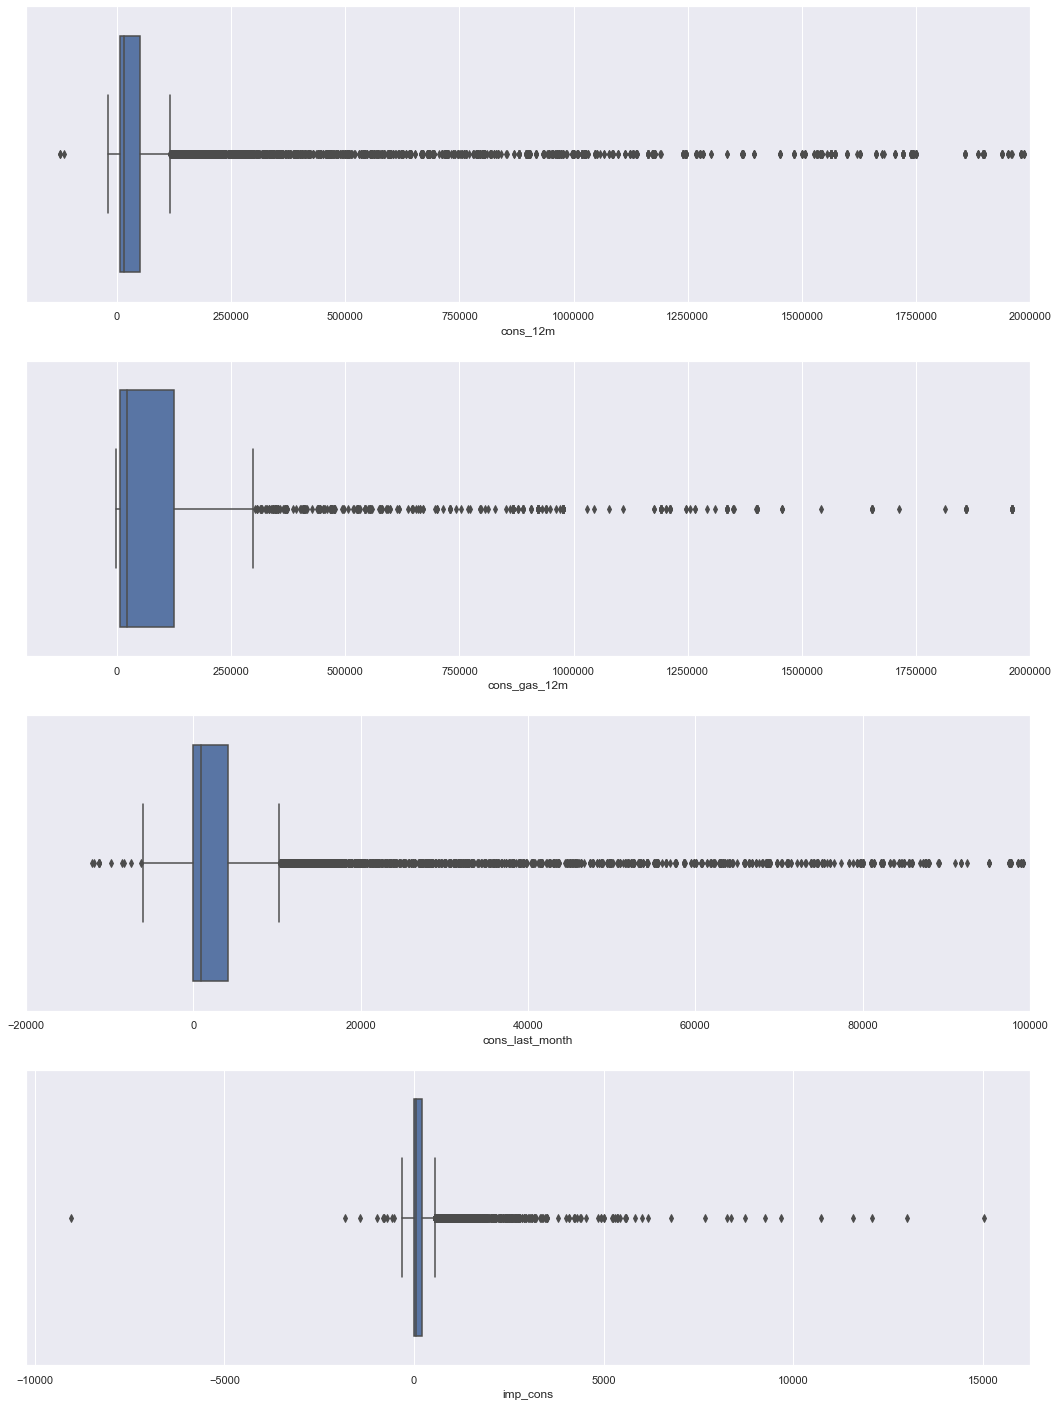

In [66]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
sns.boxplot(x=consumption['cons_12m'],ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1]) 
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2]) 
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])
#remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
#set x-axis limit
axs[0].set_xlim(-200000, 2000000) 
axs[1].set_xlim(-200000, 2000000) 
axs[2].set_xlim(-20000, 100000)

The distributions are highly skewed, and have many several outliers.
We will deal with the skewness and outliers later.

### Dates
Change the data type to datetime and plot distribution of churn and retention for each time period.

In [57]:
dates = all_[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [69]:
dates['date_activ'].head()

0    2012-11-07
1    2013-06-15
2    2009-08-21
3    2010-04-16
4    2010-03-30
Name: date_activ, dtype: object

In [58]:
#transform date format
dates['date_activ']=pd.to_datetime(dates['date_activ'],format='%Y-%m-%d')
dates['date_end']=pd.to_datetime(dates['date_end'],format='%Y-%m-%d')
dates['date_modif_prod']=pd.to_datetime(dates['date_modif_prod'],format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

In [77]:
def plot_dates(dataframe,column,fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    # Group by month
    temp=dataframe[[column,'churn','id']].set_index(column).groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
    
    #plot
    ax=temp.plot(kind='bar',stacked=True,figsize=(18,10),rot=0)
    #change x-axis labels to months
    ax.set_xticklabels(map(lambda x:line_format(x),temp.index))
    #change xlabel size
    _=plt.xticks(fontsize=fontsize_)
    _=plt.ylabel("Number of companies")
    plt.legend(['Retention','churn'],loc='upper right')
    plt.show()

In [76]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month=label.month_name()[:1]
    if label.month_name()=='January':
        month+=f'\n{label.year}'
    return month

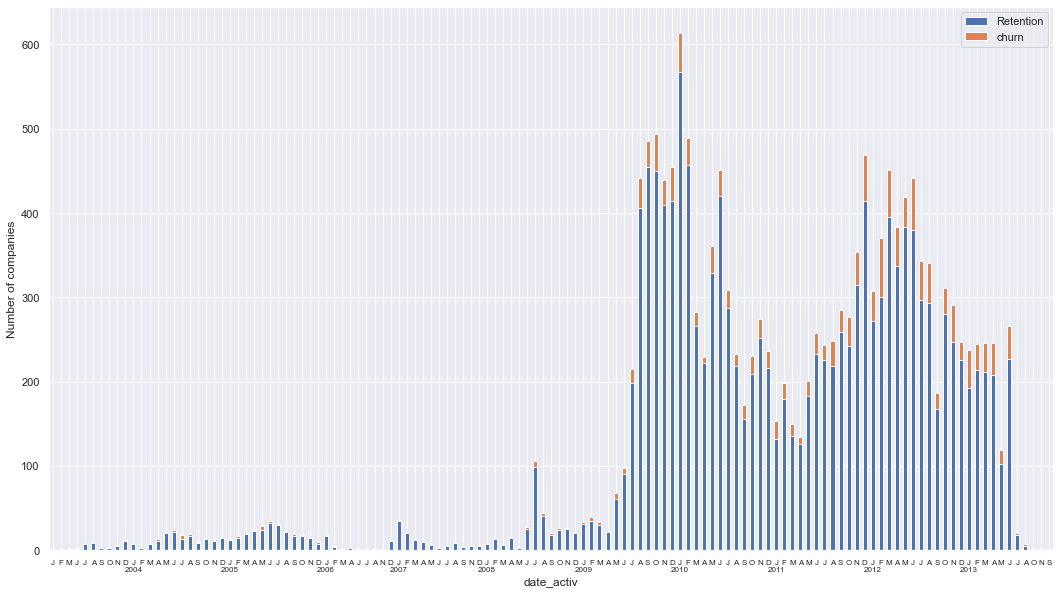

In [78]:
plot_dates(dates,'date_activ',fontsize_=8)

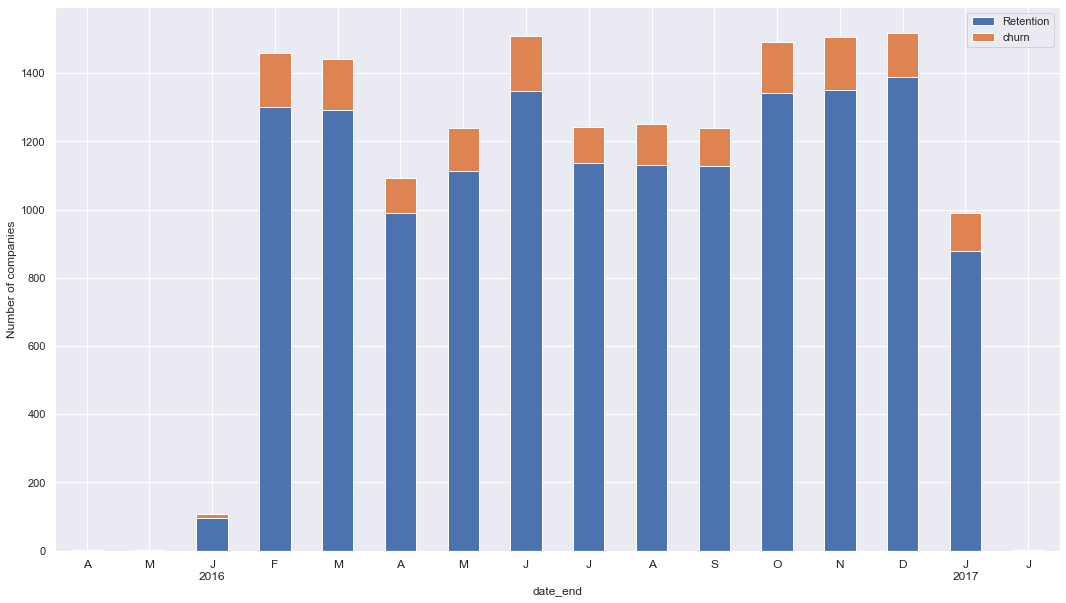

In [79]:
plot_dates(dates,'date_end')

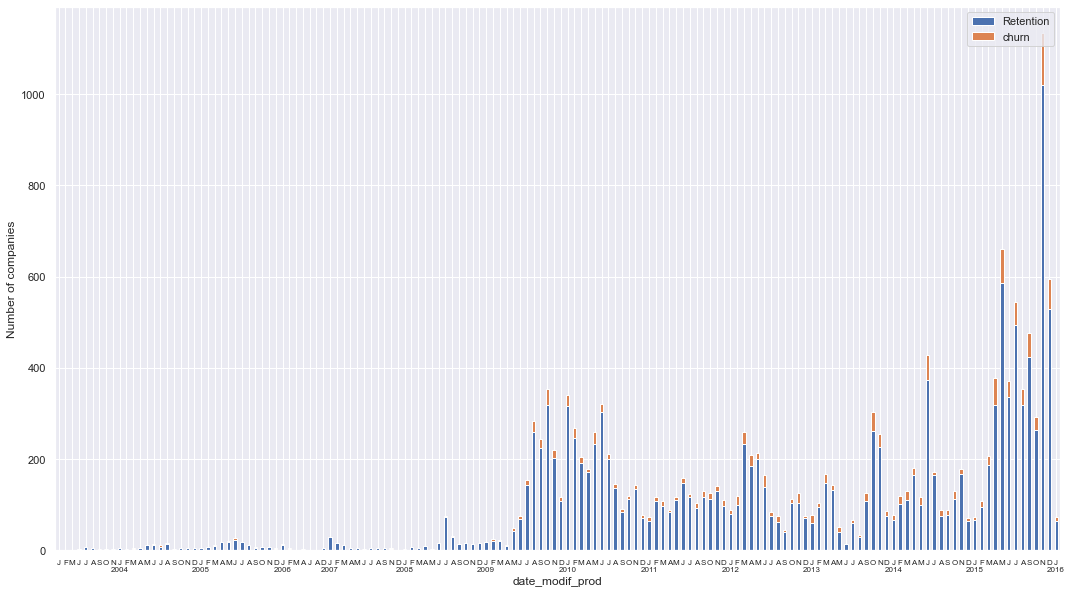

In [93]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

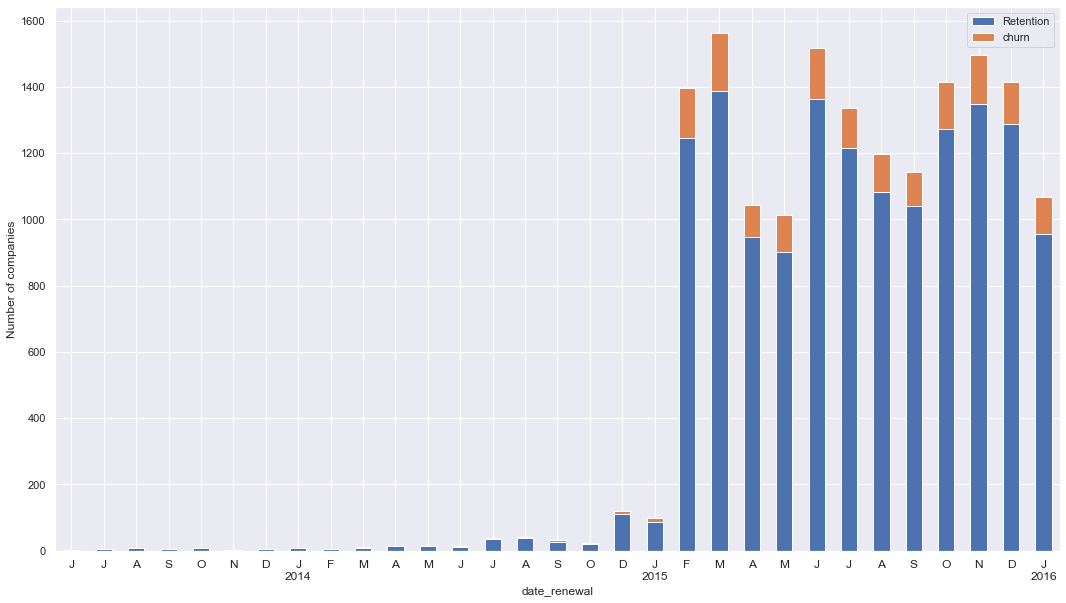

In [94]:
plot_dates(dates, "date_renewal")

The date distribution does not provide us with much useful insight. 

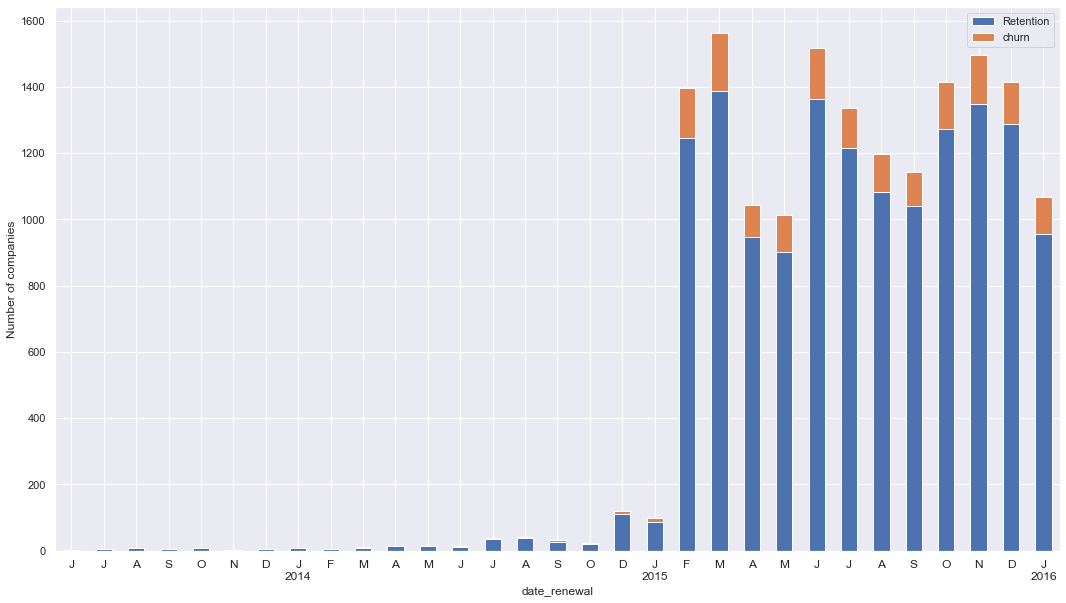

In [102]:
plot_dates(dates, "date_renewal")

### Forcast 
Distribution of churn on forcast vairbles

In [97]:
forecast = all_[["id","forecast_base_bill_ele","forecast_base_bill_year", "forecast_bill_12m","forecast_cons","forecast_cons_12m",
                 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
                 "forecast_price_energy_p1","forecast_price_energy_p2",
                 "forecast_price_pow_p1","churn"]]

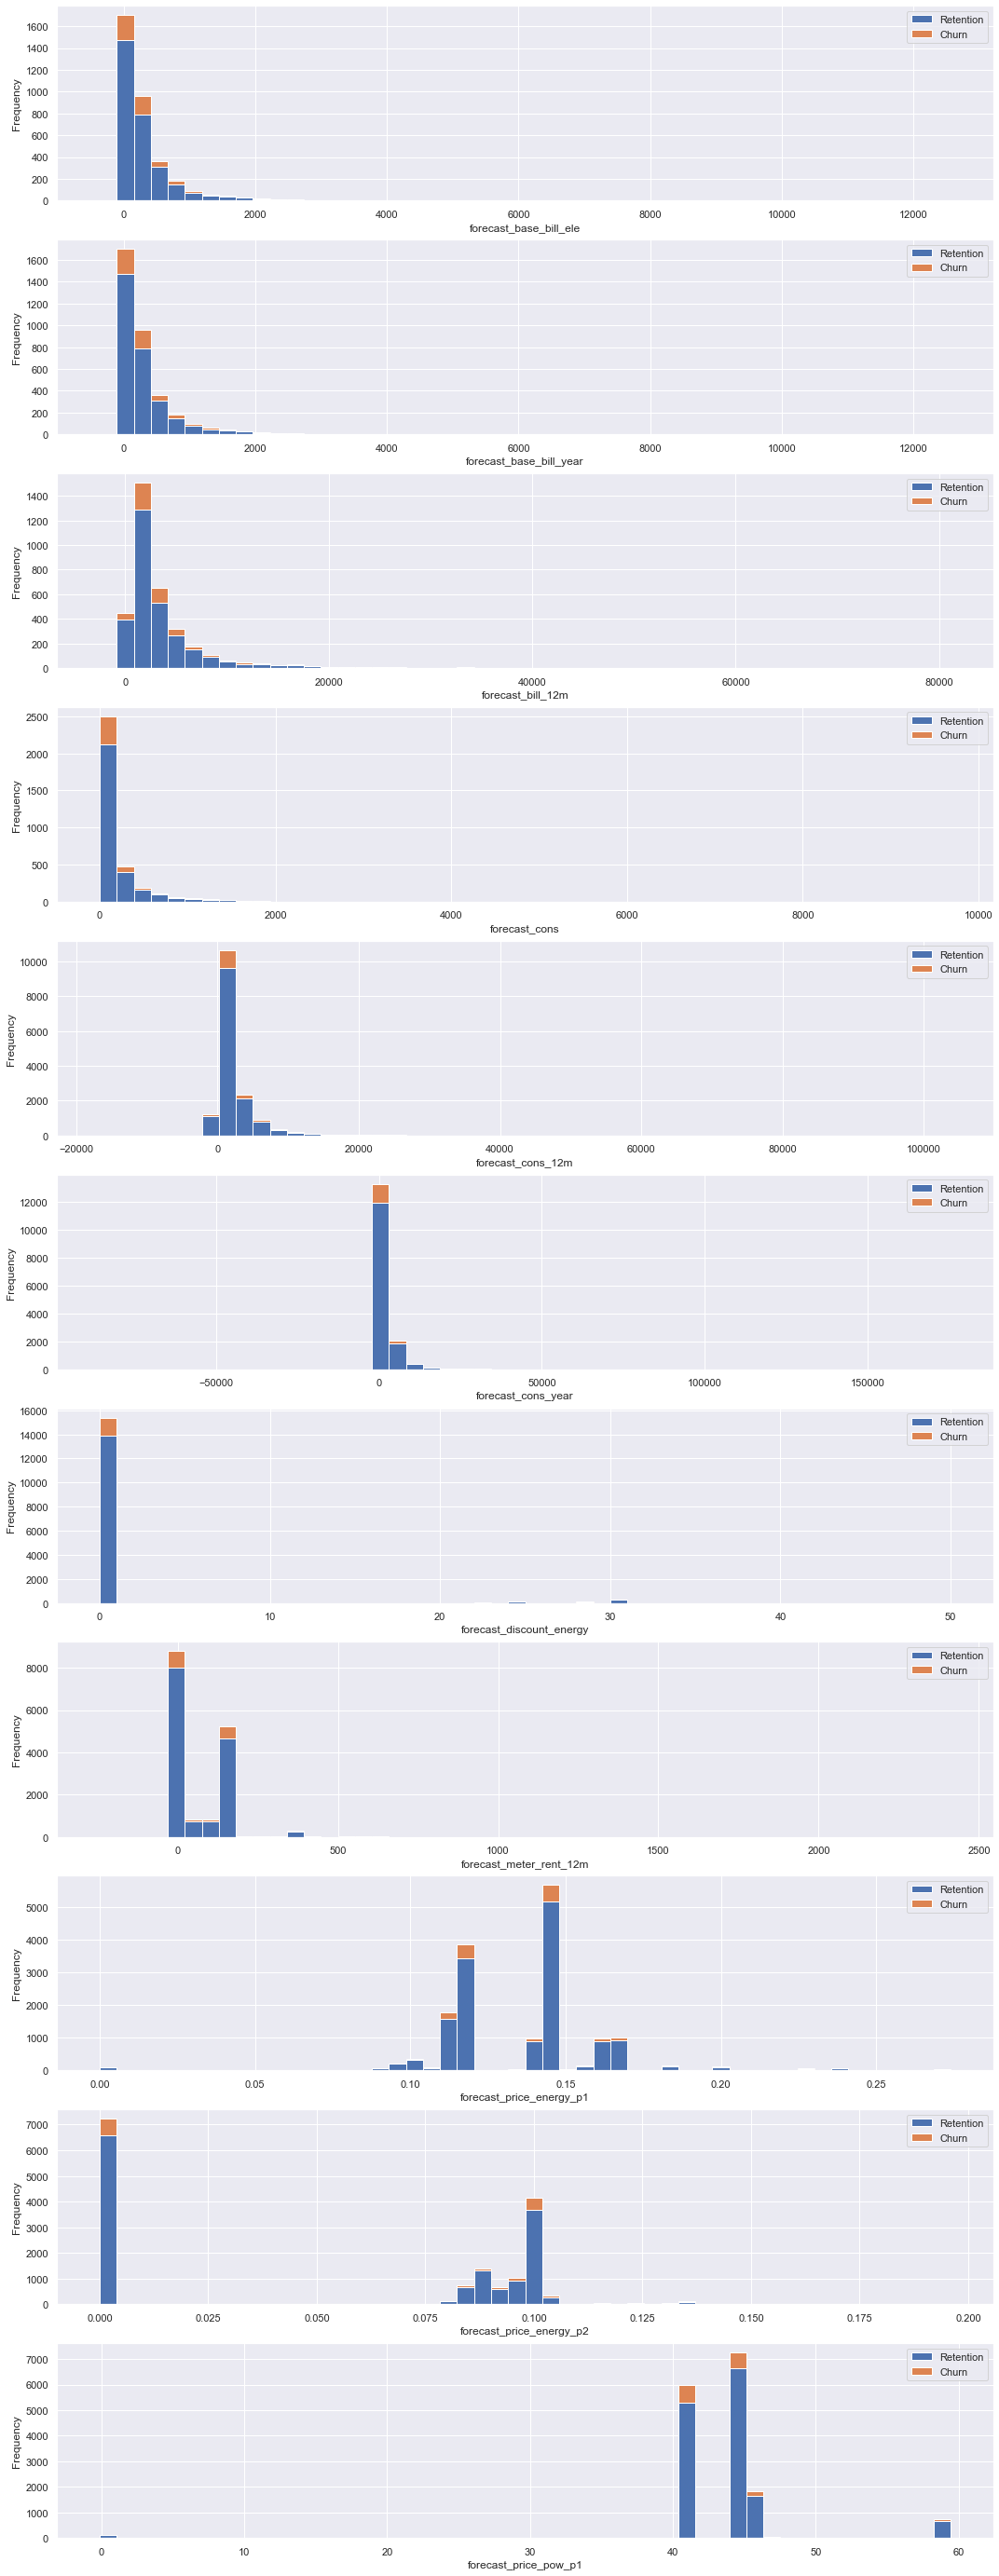

In [103]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(forecast, "forecast_base_bill_ele", axs[0]) 
plot_distribution(forecast, "forecast_base_bill_year", axs[1]) 
plot_distribution(forecast, "forecast_bill_12m", axs[2]) 
plot_distribution(forecast, "forecast_cons", axs[3]) 
plot_distribution(forecast, "forecast_cons_12m", axs[4]) 
plot_distribution(forecast, "forecast_cons_year", axs[5]) 
plot_distribution(forecast, "forecast_discount_energy", axs[6]) 
plot_distribution(forecast, "forecast_meter_rent_12m", axs[7]) 
plot_distribution(forecast, "forecast_price_energy_p1", axs[8]) 
plot_distribution(forecast, "forecast_price_energy_p2", axs[9]) 
plot_distribution(forecast, "forecast_price_pow_p1", axs[10])

### Contracty type(electricity, gas)

In [109]:
contract_type = all_[["id", "has_gas", "churn"]]
contract_gtoup=contract_type.groupby(['has_gas','churn'])['id'].count().unstack(level=1)

In [110]:
contract_gtoup

churn,0,1
has_gas,,
f,11771,1361
t,2730,234


In [123]:
contract_percentage=(contract_gtoup.div(contract_gtoup.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False
)

In [124]:
contract_percentage

churn,0,1
has_gas,,
f,89.636004,10.363996
t,92.105263,7.894737


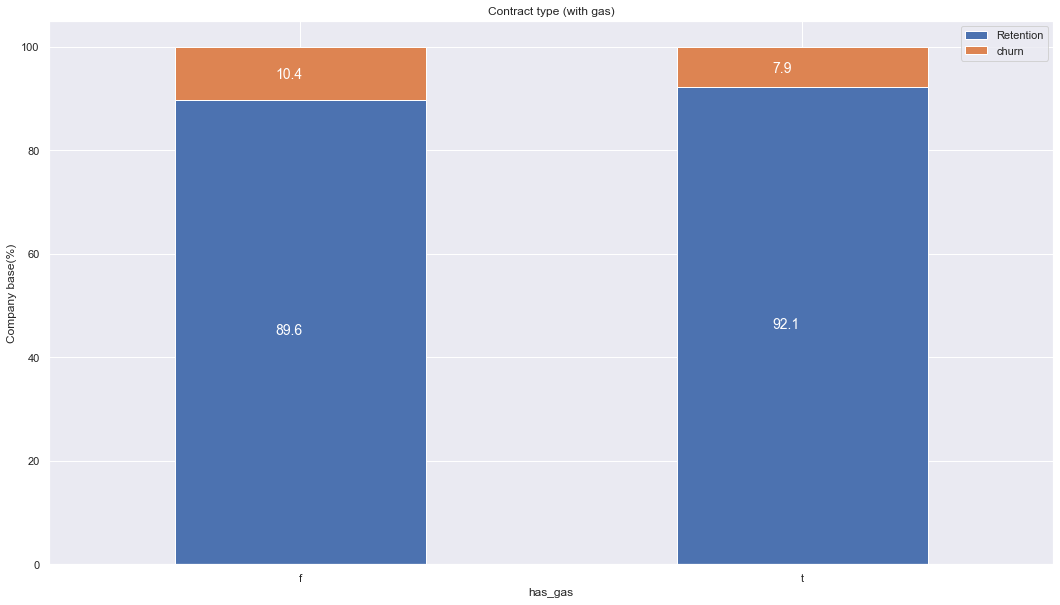

In [125]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

It seems customers that also has gas contract has less motivation to churn.

### Margins


In [126]:
margin = all_[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

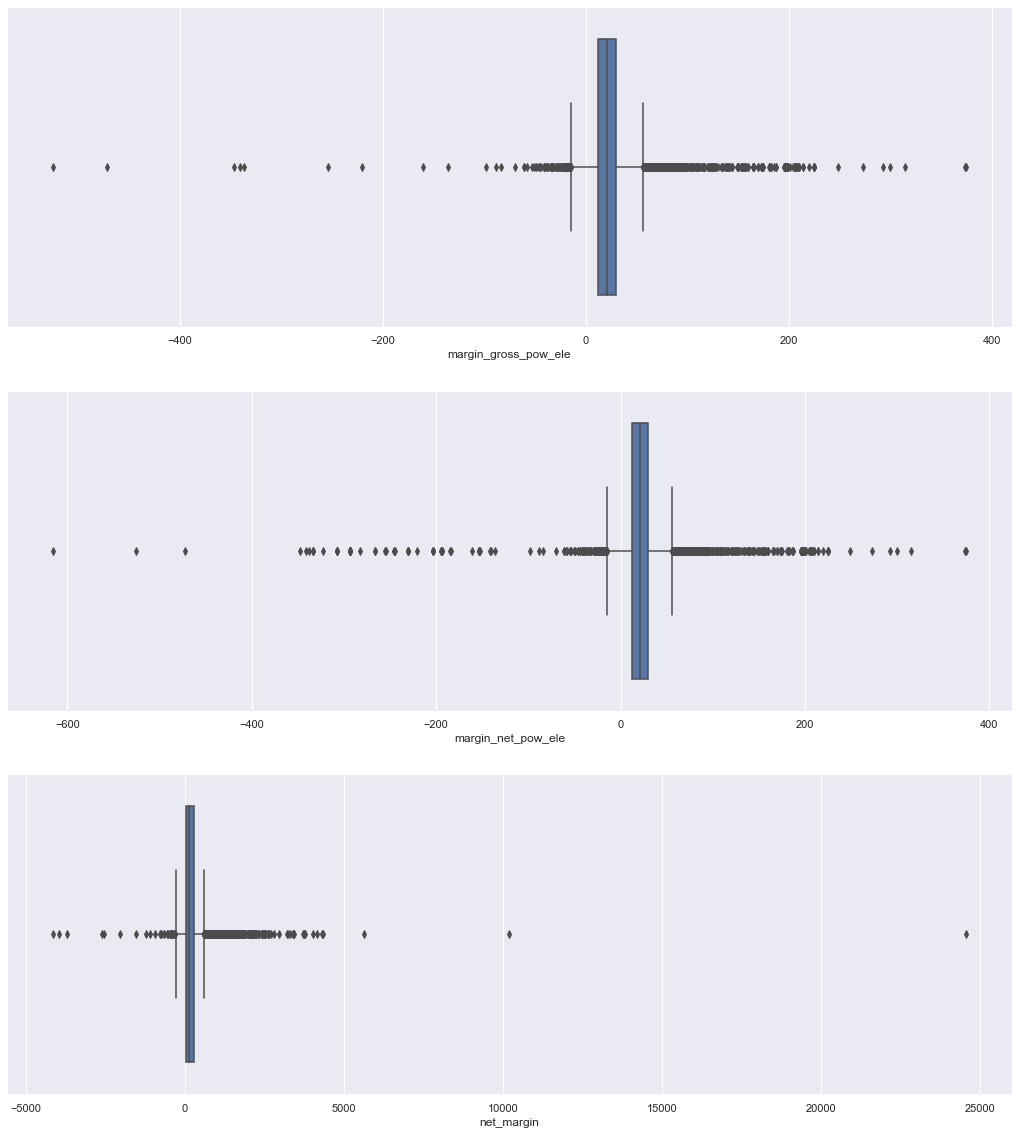

In [129]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram 
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0]) 
sns.boxplot(x=margin["margin_net_pow_ele"],ax=axs[1]) 
sns.boxplot(x=margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x') 
axs[1].ticklabel_format(style='plain', axis='x') 
axs[2].ticklabel_format(style='plain', axis='x') 
plt.show()

There are many outliers.

### Subscribed power

In [130]:
power = all_[["id","pow_max", "churn"]].fillna(0)

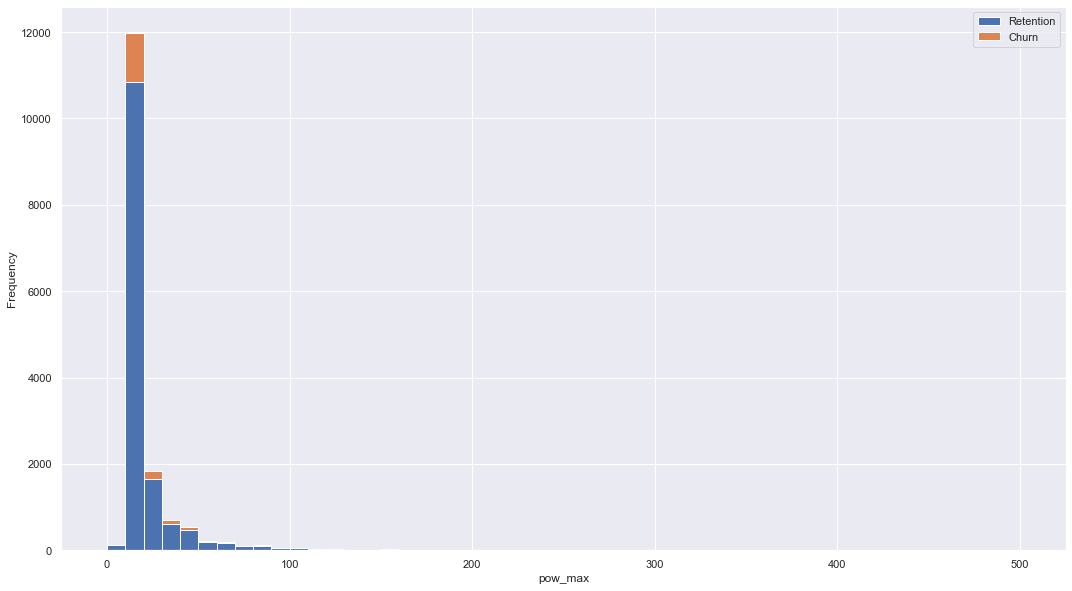

In [132]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10)) 
plot_distribution(power, "pow_max", axs)

It seems the less subscribed power is, the higher percentage of churn.

### Others

In [133]:
others = all_[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

In [146]:
products

churn,0,1
nb_prod_act,,
1,11266.0,1294.0
2,2481.0,227.0
3,505.0,56.0
4,155.0,15.0
5,34.0,3.0
6,9.0,0.0
8,8.0,0.0
9,12.0,0.0
10,2.0,0.0


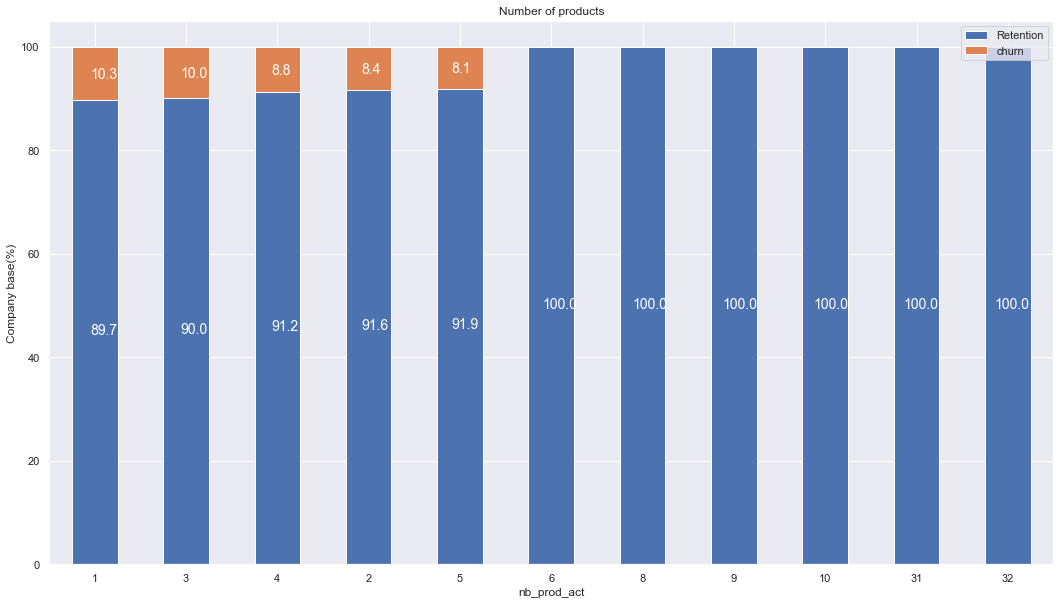

In [145]:
products=others.groupby(['nb_prod_act','churn'])['id'].count().unstack(level=1).fillna(0)
products_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
plot_stacked_bars(products_percentage,'Number of products')

some products do not have many companies.

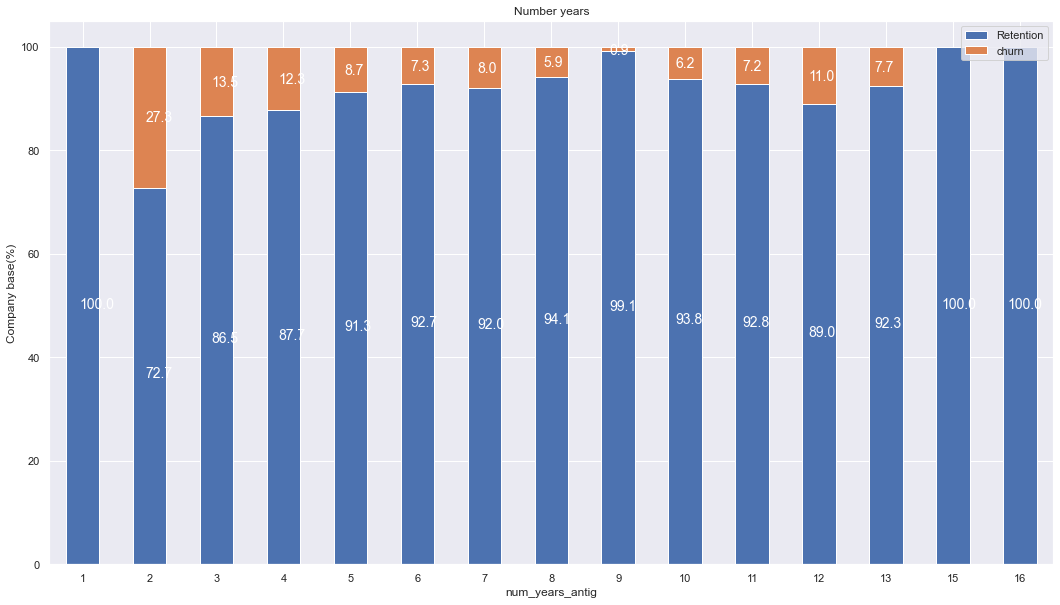

In [147]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1) 
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100) 
plot_stacked_bars(years_antig_percentage, "Number years")

In [148]:
years_antig

churn,0,1
num_years_antig,,
1,1.0,NaN
2,8.0,3.0
3,2386.0,371.0
4,3799.0,532.0
5,2278.0,217.0
6,4686.0,368.0
7,596.0,52.0
8,190.0,12.0
9,105.0,1.0


since some has only few companies, it's hard to say the relationship.

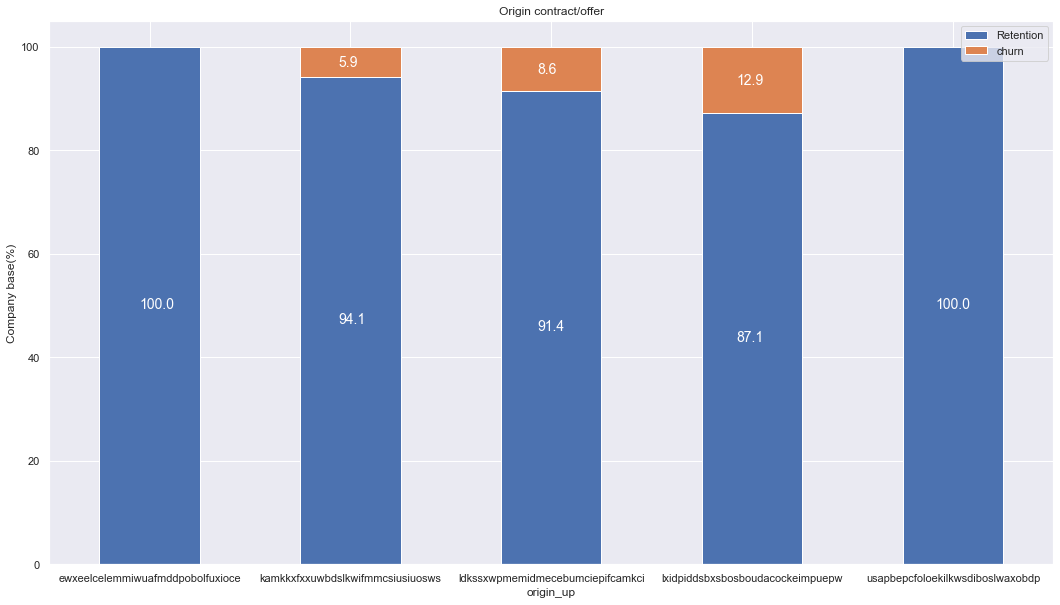

In [149]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1) 
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100) 
plot_stacked_bars(origin_percentage, "Origin contract/offer")

In [150]:
origin

churn,0,1
origin_up,,
ewxeelcelemmiwuafmddpobolfuxioce,1.0,NaN
kamkkxfxxuwbdslkwifmmcsiusiuosws,4252.0,265.0
ldkssxwpmemidmecebumciepifcamkci,3349.0,315.0
lxidpiddsbxsbosboudacockeimpuepw,6815.0,1010.0
usapbepcfoloekilkwsdiboslwaxobdp,2.0,NaN


It seems that one categoty of code has a lot more churn that other categories.

## 4. Data cleaning
### missing data

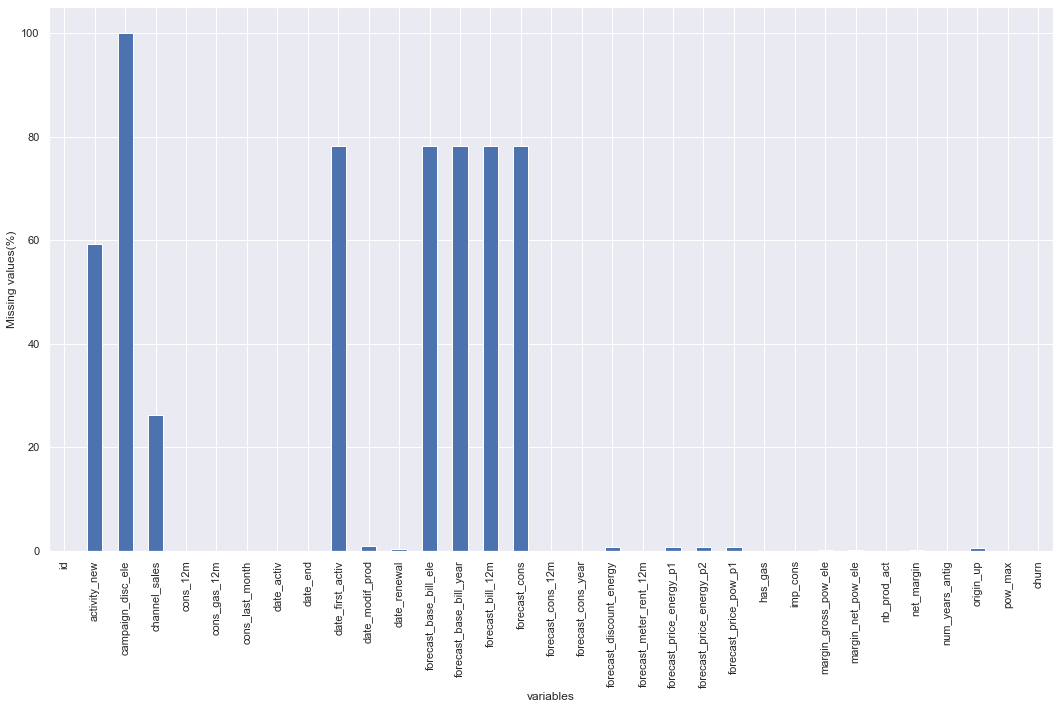

In [152]:
#plot missing data
(all_.isna().sum()/len(all_.index)*100).plot(kind='bar',figsize=(18,10))
#set axis label
_=plt.xlabel("variables")
_=plt.ylabel("Missing values(%)")
plt.show()

For simplicity, we will remove the variables with more than 60% of missing values. We might re-use some of these variables if our model is not good enough.

In [80]:
all_.drop(columns=["campaign_disc_ele", "date_first_activ", "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons"], inplace=True)

In [158]:
pd.DataFrame({"Dataframe columns": all_.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


In [160]:
all_[all_.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


There is no duplicated data.

## 5. Formatiing data
### Missing dates

There could be several ways in which we could deal with the missing dates.
One way, we could "engineer" the dates from known values. For example, the date_renewal is usually the same date as the date_modif_prod but one year ahead.
The simplest way, we will replace the missing values with the mode. For numerical values, the built-in function .mode() can be used, but this will not work for dates or strings, so we will use a workaround using .value counts()

In [88]:
all_.loc[all_['date_modif_prod'].isnull(),"date_modif_prod"]=all_['date_modif_prod'].value_counts().index[0]
all_.loc[all_['date_end'].isnull(),'date_end']=all_['date_end'].value_counts().index[0]
all_.loc[all_['date_renewal'].isnull(),"date_renewal"] = all_["date_renewal"].value_counts().index[0]

Although we are directly replacing the values in here, it is usually best practice to make a binary flag that indicates when data is missing because this is informative in itself.

## missing prices

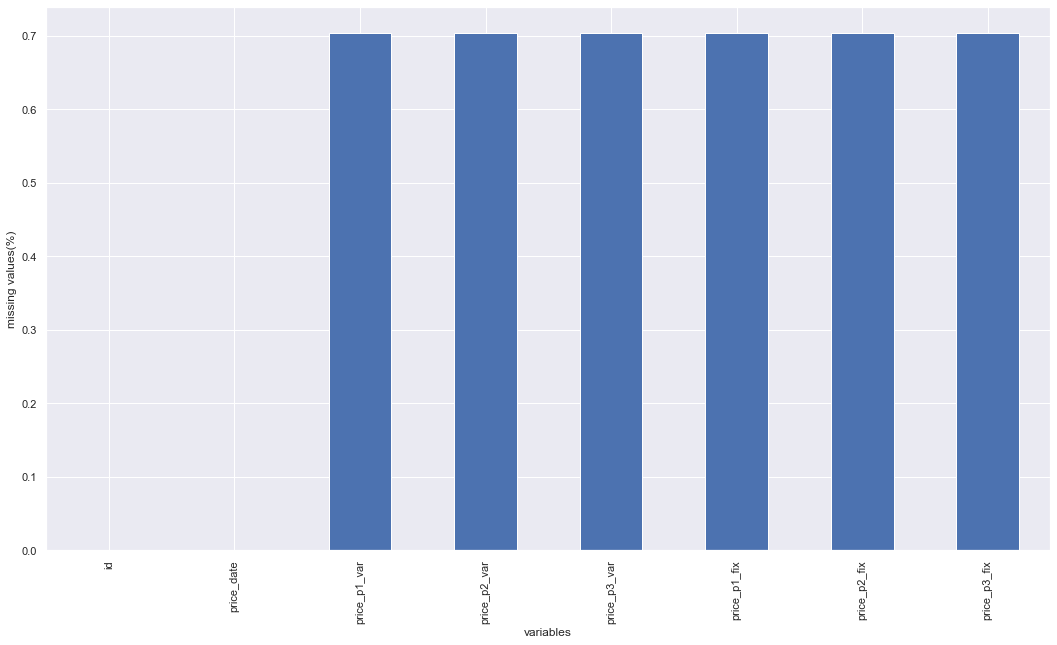

In [181]:
missing_data_percentage=history_data.isnull().sum()/len(history_data.index)*100
missing_data_percentage.plot(kind='bar',figsize=(18,10))
_=plt.xlabel("variables")
_=plt.ylabel("missing values(%)")
plt.show()

we can replace as median.

In [89]:
history_data.loc[history_data['price_p1_var'].isnull(),'price_p1_var']=history_data['price_p1_var'].median()
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"] = history_data["price_p2_var"].median() 
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"] = history_data["price_p3_var"].median() 
history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"] = history_data["price_p1_fix"].median() 
history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"] = history_data["price_p2_fix"].median() 
history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"] = history_data["price_p3_fix"].median()

## Formatting dates


In [183]:
# Transform date columns to datetime type
all_["date_activ"] = pd.to_datetime(all_["date_activ"], format='%Y-%m-%d') 
all_["date_end"] = pd.to_datetime(all_["date_end"], format='%Y-%m-%d') 
all_["date_modif_prod"] = pd.to_datetime(all_["date_modif_prod"], format='%Y-%m-%d') 
all_["date_renewal"] = pd.to_datetime(all_["date_renewal"], format='%Y-%m-%d')
history_data["price_date"] = pd.to_datetime(history_data["price_date"], format='%Y-%m-%d')

### negative data

In [184]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .
Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather than
a "price discount".
We will replace the negative values with the median (most frequent value)

In [186]:
history_data[(history_data['price_p1_fix']<0)|(history_data['price_p2_fix'] < 0) | (history_data['price_p3_fix'] < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [187]:
history_data.loc[history_data['price_p1_fix']<0,'price_p1_fix']=history_data['price_p1_fix'].median()
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median() 
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()

## save as pickle


In [189]:
if not os.path.exists(os.path.join("..", "processed_data")): os.makedirs(os.path.join("..", "processed_data"))

In [188]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_data.pkl") 
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "history_data.pkl")

In [190]:
pd.to_pickle(all_,PICKLE_TRAIN_DIR)
pd.to_pickle(history_data, PICKLE_HISTORY_DIR)